In [80]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import IPython.display as display
from IPython.display import HTML

In [81]:
GITHUB_RENDER = True

In [84]:
def basic_line_plotly(df, x, y, color_col, xt, yt, title, WIDTH, HEIGHT):
    fig = px.line(df, x=x, y=y, color=color_col, labels={'x': xt, 'y': yt}, title=title)
    fig.update_layout(title_x=0.5, width=WIDTH, height=HEIGHT, yaxis=dict(tickformat=',d'))
    
    if GITHUB_RENDER:
        image_bytes = pio.to_image(fig, format='png')
        display.display(display.Image(image_bytes))
    else:
        fig.show()

# Reddit

In [120]:
df50 = pd.read_csv('../out/filtered_df_50.csv', index_col=0)
df50.head()

,reddit image,imkg image,score
0,./data/wholesomememes/0v7kfoivik9b1.jpg,https://i.imgflip.com/6e80xv.jpg,0.594870
1,./data/wholesomememes/cfifgh4a8k9b1.jpg,https://i.imgflip.com/4gy1a3.jpg,0.672966
2,./data/wholesomememes/qrsvnczqsi9b1.jpg,https://i.imgflip.com/6e456k.jpg,0.577164
3,./data/wholesomememes/qmizpnj5ji9b1.jpg,https://i.imgflip.com/6e80xv.jpg,0.672202
4,./data/wholesomememes/btmg25ri6i9b1.jpg,https://i.imgflip.com/2qr4vs.jpg,0.636262


In [121]:
imkg_templates = pd.read_csv('../graph/out/imkg_templates.tsv', sep='\t')
node1 = list(imkg_templates['node1'].values)
node2 = list(imkg_templates['node2'].values)
df_imkg_nodes = list(df50['imkg image'].values)
df_imkg_nodes = [x.split('/')[-1].split('.')[0] for x in df_imkg_nodes]
back_dict = {}
final_dict = {}
for x, y in tqdm(zip(node1, node2)):
    back_dict[x.split(':')[-1]] = y

1326032it [00:00, 1419823.61it/s]


In [122]:
# Add timestamp information
modified_df = pd.DataFrame(columns=["reddit image", "imkg image", "score", "timestamp", "reddit score", "IMKG Class"])
for row in tqdm(df50.iterrows()):
    reddit_image = row[1]['reddit image']
    ri_cat = reddit_image.split('/')[2]+".csv"
    df_file = pd.read_csv('../data/files/dataset_{}'.format(ri_cat))
    ts = df_file[df_file['image_location'] == reddit_image]['timestamp'].values[0]
    reddit_score = df_file[df_file['image_location'] == reddit_image]['score'].values[0]
    
    imkg_image = row[1]['imkg image']
    imkg_image = imkg_image.split('/')[-1].split('.')[0]
    imkg_image = back_dict[imkg_image].split('/')[-1]
    
    modified_df.loc[len(modified_df)] = [row[1]['reddit image'], row[1]['imkg image'], row[1]['score'], ts, reddit_score, imkg_image]

2234it [00:30, 73.45it/s]


In [123]:
modified_df.shape

(2234, 6)

In [124]:
modified_df.head()

,reddit image,imkg image,score,timestamp,reddit score,IMKG Class
0,./data/wholesomememes/0v7kfoivik9b1.jpg,https://i.imgflip.com/6e80xv.jpg,0.594870,2023-07-02 11:13:52,632,Elon-Musk-Buying-Twitter
1,./data/wholesomememes/cfifgh4a8k9b1.jpg,https://i.imgflip.com/4gy1a3.jpg,0.672966,2023-07-02 10:14:36,31,Overwatch-Mercy-Meme
2,./data/wholesomememes/qrsvnczqsi9b1.jpg,https://i.imgflip.com/6e456k.jpg,0.577164,2023-07-02 05:25:38,812,Elon-Musk-Buying-Twitter
3,./data/wholesomememes/qmizpnj5ji9b1.jpg,https://i.imgflip.com/6e80xv.jpg,0.672202,2023-07-02 04:31:42,43,Elon-Musk-Buying-Twitter
4,./data/wholesomememes/btmg25ri6i9b1.jpg,https://i.imgflip.com/2qr4vs.jpg,0.636262,2023-07-02 03:21:04,82,It-aint-much-but-its-honest-work


In [125]:
modified_df['IMKG Class'].value_counts()

IMKG Class
Elon-Musk-Buying-Twitter                 328
blank-black                              167
Elon-Musk-Blank-Tweet                     71
Wants-to-know-your-location               60
I-do-ONE-Push-Up                          24
                                        ... 
Angela-scared-Dwight                       1
Always-you-three                           1
imgflipmeme:Lazy-College-Senior            1
Triggered-Liberal                          1
imgflipmeme:Say-That-Again-I-Dare-You      1
Name: count, Length: 599, dtype: int64

In [126]:
# Popular IMKG class
popular_imkg_class = ["Elon-Musk-Buying-Twitter", "blank-black", "Elon-Musk-Blank-Tweet", \
                 "Wants-to-know-your-location", "I-do-ONE-Push-Up"]

In [127]:
# Filter rest of the classes
popular_df = modified_df[modified_df['IMKG Class'].isin(popular_imkg_class)]
popular_df.shape

(650, 6)

In [128]:
popular_df.head()

,reddit image,imkg image,score,timestamp,reddit score,IMKG Class
0,./data/wholesomememes/0v7kfoivik9b1.jpg,https://i.imgflip.com/6e80xv.jpg,0.594870,2023-07-02 11:13:52,632,Elon-Musk-Buying-Twitter
2,./data/wholesomememes/qrsvnczqsi9b1.jpg,https://i.imgflip.com/6e456k.jpg,0.577164,2023-07-02 05:25:38,812,Elon-Musk-Buying-Twitter
3,./data/wholesomememes/qmizpnj5ji9b1.jpg,https://i.imgflip.com/6e80xv.jpg,0.672202,2023-07-02 04:31:42,43,Elon-Musk-Buying-Twitter
5,./data/wholesomememes/1gyp03m0bh9b1.jpg,https://i.imgflip.com/6e80xv.jpg,0.627035,2023-07-02 00:24:28,610,Elon-Musk-Buying-Twitter
6,./data/wholesomememes/jxvnb99sig9b1.jpg,https://i.imgflip.com/61285t.jpg,0.715413,2023-07-01 21:46:13,290,Elon-Musk-Blank-Tweet


## Daily trend analysis

In [129]:
popular_df['Date'] = pd.to_datetime(popular_df['timestamp'])
popular_df = popular_df[(popular_df["Date"].dt.month >= 5) & (popular_df["Date"].dt.month <= 6)]
popular_df['Date'] = pd.to_datetime(popular_df['Date']).dt.date
popular_df_grouped = popular_df.groupby(['Date', 'IMKG Class']).size().reset_index(name='Counts')

/tmp/ipykernel_79644/1605828774.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [130]:
popular_df.head()

,reddit image,imkg image,score,timestamp,reddit score,IMKG Class,Date
16,./data/wholesomememes/wwhfkehz279b1.jpg,https://i.imgflip.com/6e80xv.jpg,0.626486,2023-06-30 14:01:27,4689,Elon-Musk-Buying-Twitter,2023-06-30
17,./data/wholesomememes/kfsliu2dw69b1.jpg,https://i.imgflip.com/17f70q.jpg,0.603972,2023-06-30 13:24:20,21480,blank-black,2023-06-30
19,./data/wholesomememes/7x2y1fmbm29b1.jpg,https://i.imgflip.com/48bzci.jpg,0.550667,2023-06-29 23:01:41,3185,I-do-ONE-Push-Up,2023-06-29
20,./data/wholesomememes/4ntpw0jrz09b1.jpg,https://i.imgflip.com/6e456k.jpg,0.569755,2023-06-29 17:33:03,262,Elon-Musk-Buying-Twitter,2023-06-29
22,./data/wholesomememes/mar8m6o2609b1.jpg,https://i.imgflip.com/17f70q.jpg,0.541545,2023-06-29 14:47:07,8204,blank-black,2023-06-29


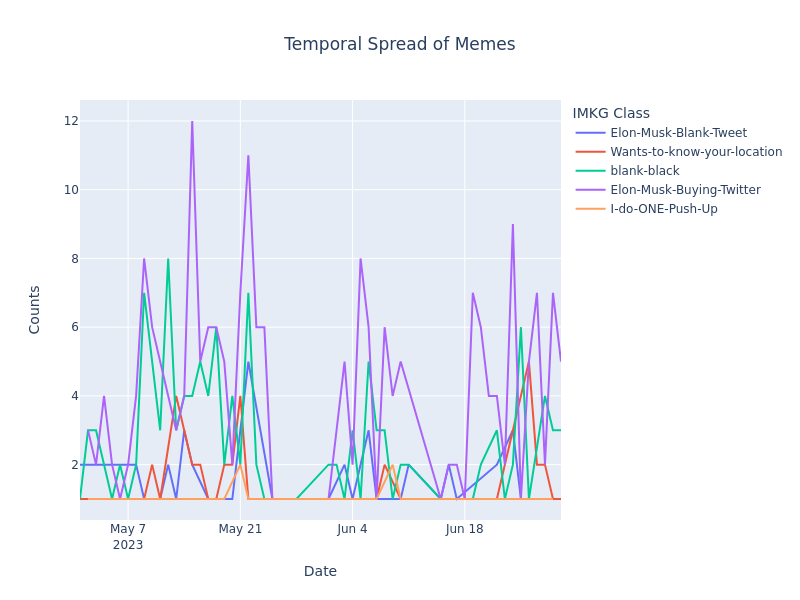

In [131]:
basic_line_plotly(popular_df_grouped, x='Date', y='Counts', \
                  color_col='IMKG Class', xt='Date', \
                  yt='Count', title='Temporal Spread of Memes', \
                  WIDTH=800, HEIGHT=600)

## Popularity analysis

In [132]:
popular_df_grouped_score = popular_df.groupby(['Date', 'IMKG Class'])['reddit score'].sum().reset_index(name='SumOfRedditScore')

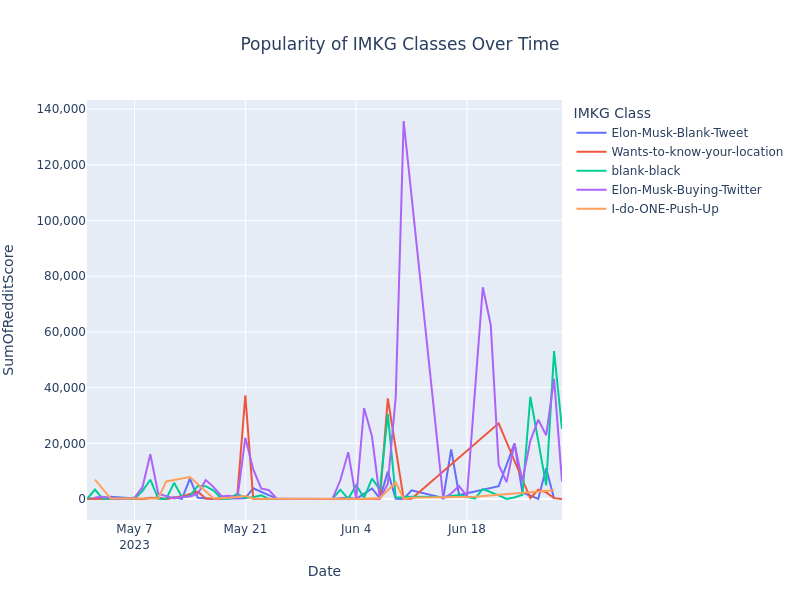

In [133]:
basic_line_plotly(popular_df_grouped_score, x='Date', y='SumOfRedditScore', \
                  color_col='IMKG Class', xt='Date', \
                  yt='Count', title='Popularity of IMKG Classes Over Time', \
                  WIDTH=800, HEIGHT=600)

## Hate speech analysis

In [ ]:
#TODO

# Discord

In [134]:
df50 = pd.read_csv('../out/discord_filtered_df_50.csv', index_col=0)
df50.head()

,reddit image,imkg image,score,timestamp
0,https://cdn.discordapp.com/attachments/6047015...,https://i.imgflip.com/431kiz.jpg,0.718187,2019-07-27T16:57:49.673+00:00
1,https://cdn.discordapp.com/attachments/6047015...,https://i.imgflip.com/1xtg4l.jpg,0.513173,2019-07-27T19:19:32.241+00:00
2,https://cdn.discordapp.com/attachments/6047015...,https://i.imgflip.com/17f70q.jpg,0.538976,2019-07-29T01:42:01.799+00:00
3,https://cdn.discordapp.com/attachments/6047015...,https://i.imgflip.com/6e80xv.jpg,0.663427,2019-07-29T01:42:01.799+00:00
4,https://cdn.discordapp.com/attachments/6047015...,https://i.imgflip.com/6e80xv.jpg,0.591051,2019-07-29T01:42:01.799+00:00


In [135]:
df50.shape

(1094, 4)

In [136]:
imkg_templates = pd.read_csv('../graph/out/imkg_templates.tsv', sep='\t')
node1 = list(imkg_templates['node1'].values)
node2 = list(imkg_templates['node2'].values)
df_imkg_nodes = list(df50['imkg image'].values)
df_imkg_nodes = [x.split('/')[-1].split('.')[0] for x in df_imkg_nodes]
back_dict = {}
final_dict = {}
for x, y in tqdm(zip(node1, node2)):
    back_dict[x.split(':')[-1]] = y

1326032it [00:00, 1432567.10it/s]


In [144]:
# Add timestamp information
modified_df = pd.DataFrame(columns=["reddit image", "imkg image", "score", "timestamp", "IMKG Class"])
for row in tqdm(df50.iterrows()):
    imkg_image = row[1]['imkg image']
    imkg_image = imkg_image.split('/')[-1].split('.')[0]
    imkg_image = back_dict[imkg_image].split('/')[-1]
    modified_df.loc[len(modified_df)] = [row[1]['reddit image'], row[1]['imkg image'], row[1]['score'], row[1]['timestamp'], imkg_image]

1094it [00:01, 904.03it/s]


In [145]:
modified_df['IMKG Class'].value_counts()

IMKG Class
Elon-Musk-Buying-Twitter             270
blank-black                           70
imgflipmeme:Batman-Slapping-Robin     66
Elon-Musk-Blank-Tweet                 65
Wants-to-know-your-location           29
                                    ... 
Why-are-you-gay                        1
imgflipmeme:Monkey-Puppet              1
Spiderman-Presentation                 1
Mario-Bros-Views                       1
mr-bean                                1
Name: count, Length: 299, dtype: int64

In [146]:
# Popular IMKG class
popular_imkg_class = ["Elon-Musk-Buying-Twitter", "blank-black", "Elon-Musk-Blank-Tweet", \
                 "Wants-to-know-your-location", "imgflipmeme:Batman-Slapping-Robin"]

In [147]:
# Filter rest of the classes
popular_df = modified_df[modified_df['IMKG Class'].isin(popular_imkg_class)]
popular_df.shape

(500, 5)

In [148]:
popular_df.head()

,reddit image,imkg image,score,timestamp,IMKG Class
2,https://cdn.discordapp.com/attachments/6047015...,https://i.imgflip.com/17f70q.jpg,0.538976,2019-07-29T01:42:01.799+00:00,blank-black
3,https://cdn.discordapp.com/attachments/6047015...,https://i.imgflip.com/6e80xv.jpg,0.663427,2019-07-29T01:42:01.799+00:00,Elon-Musk-Buying-Twitter
4,https://cdn.discordapp.com/attachments/6047015...,https://i.imgflip.com/6e80xv.jpg,0.591051,2019-07-29T01:42:01.799+00:00,Elon-Musk-Buying-Twitter
5,https://cdn.discordapp.com/attachments/6047015...,https://i.imgflip.com/61285t.jpg,0.643787,2019-07-29T02:49:28.826+00:00,Elon-Musk-Blank-Tweet
7,https://cdn.discordapp.com/attachments/6047015...,https://i.imgflip.com/6e456k.jpg,0.704008,2019-07-29T02:49:28.826+00:00,Elon-Musk-Buying-Twitter


## Daily trend analysis

In [149]:
popular_df['Date'] = pd.to_datetime(popular_df['timestamp'])
# popular_df = popular_df[(popular_df["Date"].dt.month >= 5) & (popular_df["Date"].dt.month <= 6)]
popular_df['Date'] = pd.to_datetime(popular_df['Date']).dt.date
popular_df_grouped = popular_df.groupby(['Date', 'IMKG Class']).size().reset_index(name='Counts')

/tmp/ipykernel_79644/1327605124.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_79644/1327605124.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



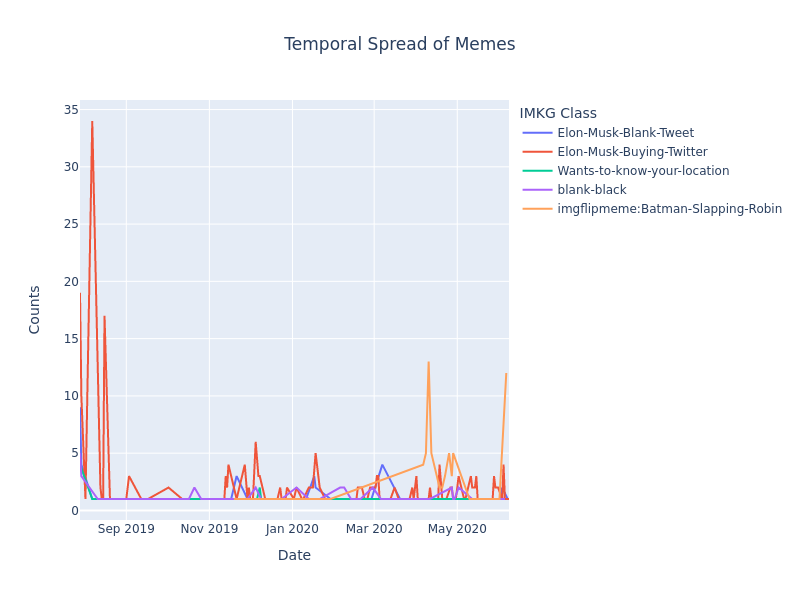

In [150]:
basic_line_plotly(popular_df_grouped, x='Date', y='Counts', \
                  color_col='IMKG Class', xt='Date', \
                  yt='Count', title='Temporal Spread of Memes', \
                  WIDTH=800, HEIGHT=600)

## Popularity analysis

## Hate speech analysis